In [463]:
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import plot_confusion_matrix

#other
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc, roc_auc_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

!pip install xgboost
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [464]:
#read dataset
preprocessed_df = pd.read_csv('./Data/preprocessed_df.cvs', index_col = 0) 
preprocessed_df.head()

,status_group,amount_tsh,gps_height,longitude,latitude,population,age,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,...,scheme_name_group_m,scheme_name_group_machumba estate pipe line,scheme_name_group_makwale water supplied sche,scheme_name_group_mkongoro one,scheme_name_group_n,scheme_name_group_ngana water supplied scheme,scheme_name_group_other,scheme_name_group_s,scheme_name_group_uroki-bomang'ombe water sup,scheme_name_group_wanging'ombe water
0,1,6000.0,1390,34.938093,-9.856322,109,14,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.0,1399,34.698766,-2.147466,280,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,25.0,686,37.460664,-3.821329,250,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,263,38.486161,-11.155298,58,27,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0.0,0,31.130847,-1.825359,150,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [465]:
preprocessed_df.shape

(59400, 287)

In [466]:
#define X and y
y = preprocessed_df['status_group']
X = preprocessed_df.drop(['status_group'], axis = 1)

In [467]:
#perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# Data Transformation

After splitting the data into training and test sets, we use the `MixMaxScaler()` to fit and transform `X_train` and transform `X_test` of continuous variables.

We want to fit and transform only the training data because in a real-world setting, we only have access to this data. We can then use the same scalar object to transform the test data. 

If we to first transform the data and then split into training and test sets, it will lead to data-leakage. 

In [468]:
#scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

# Decision Tree

In [469]:
#instantiate baseline model
decision_tree_clf = DecisionTreeClassifier(random_state = 21, criterion = 'entropy')

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

Train accuracy: 99.76010101010101
Test accuracy: 75.85858585858585


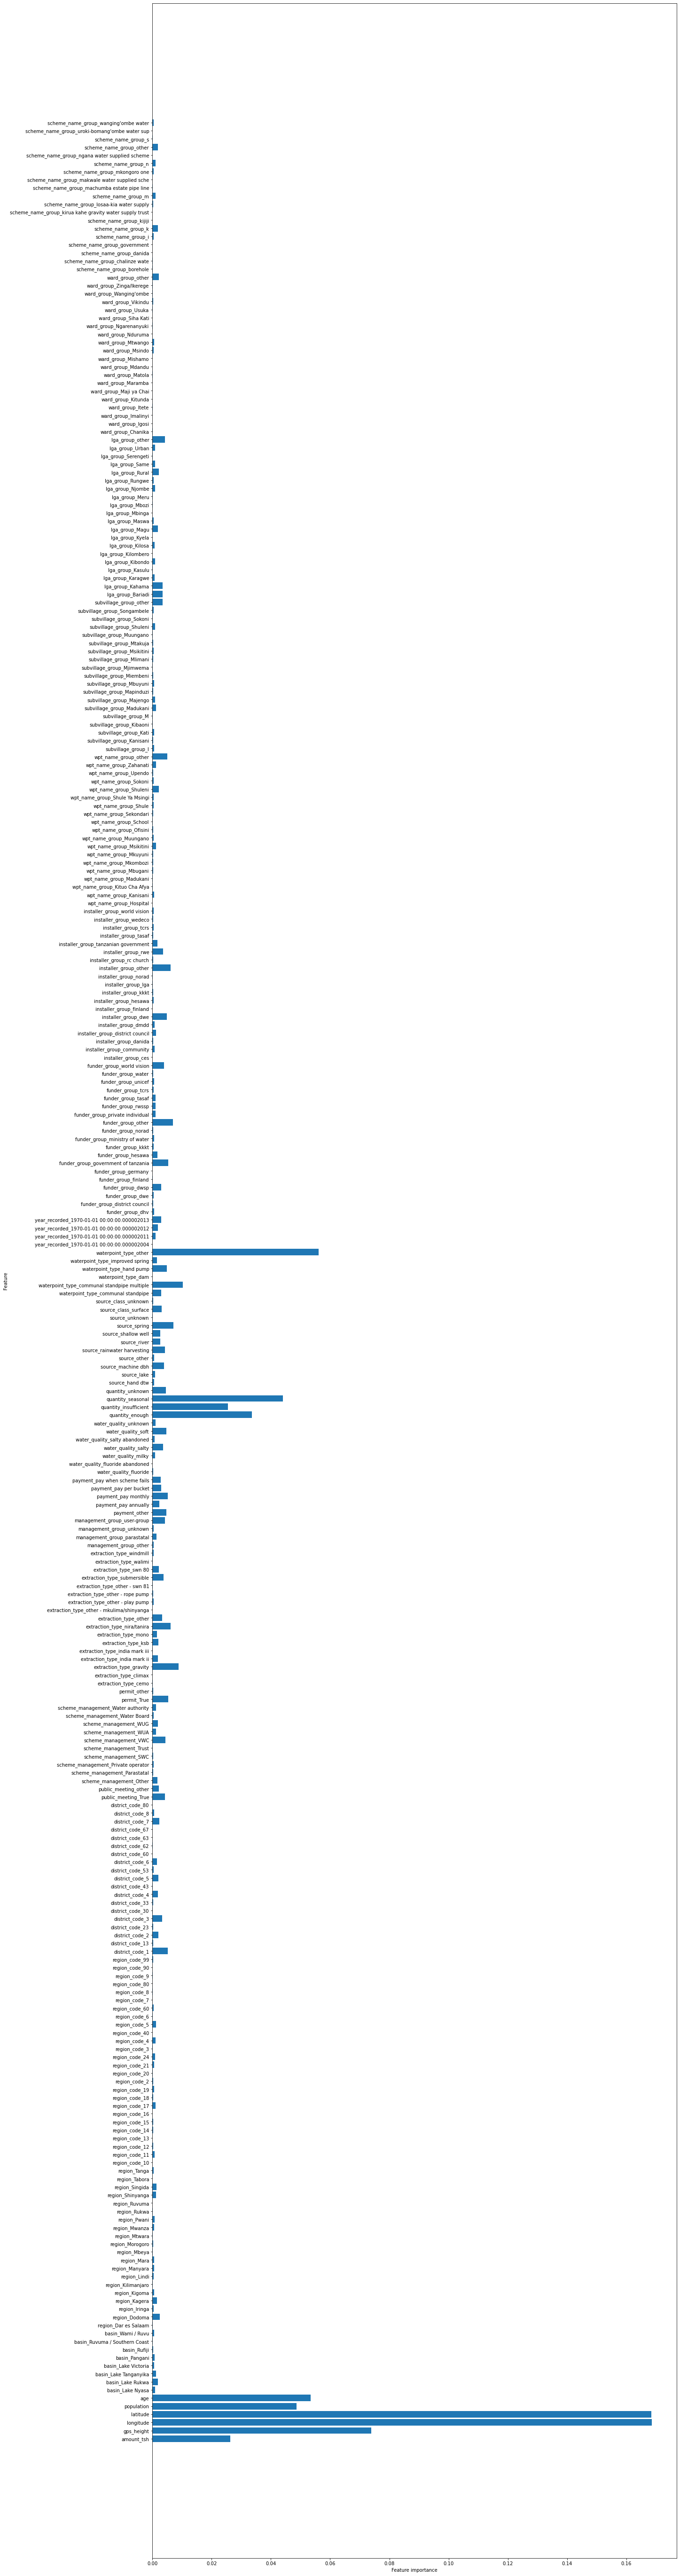

In [470]:
#feature importance
decision_tree_clf.feature_importances_;

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize = (20, 100))
    plt.barh(range(n_features), model.feature_importances_, align = 'center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(decision_tree_clf)

#save
plt.savefig('./Data/decision_tree_clf_feature_importances')

In [471]:
#look for columns with 'ward'
preprocessed_df.filter(like = 'ward').columns

Index(['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', 'ward_group_Wanging'ombe',
       'ward_group_Zinga/Ikerege', 'ward_group_other'],
      dtype='object')

In [472]:
#look for columns with 'subvillage'
preprocessed_df.filter(like = 'subvillage').columns

Index(['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'],
      dtype='object')

In [473]:
#look for columns with 'wpt_name'
preprocessed_df.filter(like = 'wpt_name').columns

Index(['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'],
      dtype='object')

In [474]:
#drop features
X.drop(columns = ['ward_group_Chanika', 'ward_group_Igosi', 'ward_group_Imalinyi',
       'ward_group_Itete', 'ward_group_Kitunda', 'ward_group_Maji ya Chai',
       'ward_group_Maramba', 'ward_group_Matola', 'ward_group_Mdandu',
       'ward_group_Mishamo', 'ward_group_Msindo', 'ward_group_Mtwango',
       'ward_group_Nduruma', 'ward_group_Ngarenanyuki', 'ward_group_Siha Kati',
       'ward_group_Usuka', 'ward_group_Vikindu', "ward_group_Wanging'ombe",
       'ward_group_Zinga/Ikerege', 'ward_group_other'], axis = 1, inplace = True)

In [475]:
#drop features
X.drop(columns = ['subvillage_group_I', 'subvillage_group_Kanisani',
       'subvillage_group_Kati', 'subvillage_group_Kibaoni',
       'subvillage_group_M', 'subvillage_group_Madukani',
       'subvillage_group_Majengo', 'subvillage_group_Mapinduzi',
       'subvillage_group_Mbuyuni', 'subvillage_group_Miembeni',
       'subvillage_group_Mjimwema', 'subvillage_group_Mlimani',
       'subvillage_group_Msikitini', 'subvillage_group_Mtakuja',
       'subvillage_group_Muungano', 'subvillage_group_Shuleni',
       'subvillage_group_Sokoni', 'subvillage_group_Songambele',
       'subvillage_group_other'], axis = 1, inplace = True)

In [476]:
#drop features
X.drop(columns = ['wpt_name_group_Hospital', 'wpt_name_group_Kanisani',
       'wpt_name_group_Kituo Cha Afya', 'wpt_name_group_Madukani',
       'wpt_name_group_Mbugani', 'wpt_name_group_Mkombozi',
       'wpt_name_group_Mkuyuni', 'wpt_name_group_Msikitini',
       'wpt_name_group_Muungano', 'wpt_name_group_Ofisini',
       'wpt_name_group_School', 'wpt_name_group_Sekondari',
       'wpt_name_group_Shule', 'wpt_name_group_Shule Ya Msingi',
       'wpt_name_group_Shuleni', 'wpt_name_group_Sokoni',
       'wpt_name_group_Upendo', 'wpt_name_group_Zahanati',
       'wpt_name_group_other'], axis = 1, inplace = True)

In [477]:
#re-perform test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [478]:
#re-scale to make sure that all of our data is represented at the same scale
scale = MinMaxScaler()

#fit
X_train = scale.fit_transform(X_train) #to create a scaled version of the training dataset
X_test = scale.transform(X_test) #to create a scaled version of the test dataset

# Deal with Class Imbalance

In [479]:
#previous original class distribution
print('Class Distribution Before:')
print('Train Set')
print(y_train.value_counts())

#fit
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#check class distribution
print('\n')
print('Class Distribution After:')
print('Train Set')
print(pd.Series(y_train).value_counts())

Class Distribution Before:
Train Set
1    25825
0    18210
2     3485
Name: status_group, dtype: int64


Class Distribution After:
Train Set
2    25825
1    25825
0    25825
Name: status_group, dtype: int64


In [480]:
#instantiate trimmed model
decision_tree_clf = DecisionTreeClassifier(random_state = 21)

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

#Train accuracy: 99.75605033881897
#Test accuracy: 75.10942760942761

Train accuracy: 99.75605033881897
Test accuracy: 75.10942760942761


In [481]:
#set param grid
#decision_tree_param_grid = {'criterion' : ['gini', 'entropy'],
#                            'min_samples_split' : [8, 10],
#                            'min_samples_leaf' : [3, 4, 5],
#                            'max_depth': [40, 80],
#                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
#decision_tree_gridsearch = GridSearchCV(estimator = decision_tree_clf, 
#                                        param_grid = decision_tree_param_grid,
#                                        scoring = 'accuracy', 
#                                        cv = 5,
#                                        n_jobs = -1)

#fit
#decision_tree_gridsearch.fit(X_train, y_train)

#best param
#decision_tree_gridsearch.best_params_

#'criterion': 'gini',
#'max_depth': 40,
#'max_features': 'auto',
#'min_samples_leaf': 3,
#'min_samples_split': 8

{'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10}

In [482]:
#get cross-validation result
#decision_tree_cross_val_results = pd.DataFrame(decision_tree_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(decision_tree_cross_val_results))

#save
#decision_tree_cross_val_resultss.to_csv('./Data/decision_tree_cross_val_results')

#decision_tree_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 72


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.939872,0.048194,0.037876,0.008379,gini,40,auto,3,8,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.715521,0.752307,0.755340,0.760181,0.768119,0.750294,0.018189,15
1,1.014193,0.037790,0.037927,0.004435,gini,40,auto,3,10,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.724234,0.760762,0.754114,0.767086,0.771410,0.755521,0.016701,7
2,1.007252,0.022069,0.040832,0.008599,gini,40,auto,4,8,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.717070,0.738045,0.741530,0.752178,0.747402,0.739245,0.012101,31
3,0.968658,0.036722,0.040924,0.005620,gini,40,auto,4,10,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.710423,0.739787,0.746757,0.752436,0.755405,0.740962,0.016173,29
4,0.765399,0.017040,0.022495,0.001338,gini,40,auto,5,8,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.706357,0.744885,0.735140,0.743078,0.750177,0.735928,0.015553,33


In [483]:
#train a classifier with optimal values identified above
decision_tree_clf = DecisionTreeClassifier(random_state = 21, 
                                           criterion = 'gini',
                                           max_depth = 40,
                                           max_features = 'auto',
                                           min_samples_leaf = 3,
                                           min_samples_split = 8)

#fit
decision_tree_clf.fit(X_train, y_train)

#predict
y_hat_train = decision_tree_clf.predict(X_train)
y_hat_test = decision_tree_clf.predict(X_test)

#train accuracy 
decision_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(decision_tree_train_accuracy))

#test accuracy 
decision_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(decision_tree_test_accuracy))

#Train accuracy: 82.5892223297838
#Test accuracy: 70.34511784511784

Train accuracy: 82.5892223297838
Test accuracy: 70.34511784511784


In [484]:
#train cross validation
decision_tree_train_cv_score = cross_val_score(decision_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_train_cv_score)

#test cross validation
decision_tree_test_cv_score = cross_val_score(decision_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:',decision_tree_test_cv_score)

Train cross validation: 0.7502936431106809
Train cross validation: 0.6898148148148148


In [485]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.34175084175084175
Mean Squared Error: 0.4321548821548822
Root Mean Squared Error: 0.6573848812947269


In [486]:
#classification report
decision_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', decision_tree_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      4614
           1       0.80      0.71      0.75      6434
           2       0.26      0.54      0.35       832

    accuracy                           0.70     11880
   macro avg       0.60      0.66      0.61     11880
weighted avg       0.74      0.70      0.72     11880



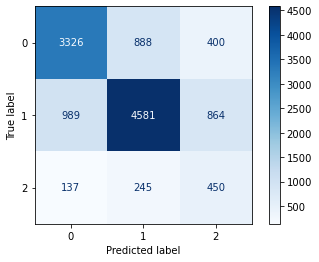

In [487]:
#plot confusion matrix
plot_confusion_matrix(decision_tree_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [488]:
#function bias() to calculate the bias of a model's predictions given the actual data
def bias(y, y_hat):
    return np.mean(y_hat - y)

#function variance() to calculate the variance of a model's predictions
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.08787878787878788
0.46590651180718534


In [489]:
#summary table
summary_table = pd.DataFrame({'Model': [],
                              'Accuracy': [], 'CV': [], 
                              'Precision': [], 'Recall': [], 'F1 Score': [],
                              'MAE': [], 'MSE': [], 'RMSE': [],
                              'AUC': [], 'Bias': [], 'Variance': []
                              })

summary_table.loc[0] = ['Decision Tree',
                        round(decision_tree_test_accuracy, 2), round(decision_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.6,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907


# Logistic Regression

In [490]:
#instantiate baseline model
logreg_clf = LogisticRegression(random_state = 21)

#fit
logreg_clf.fit(X_train, y_train)

#predict
y_hat_train = logreg_clf.predict(X_train)
y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(logreg_test_accuracy))

#Train accuracy: 67.75217812197482
#Test accuracy: 65.79966329966331

Train accuracy: 67.75217812197482
Test accuracy: 65.79966329966331


In [491]:
#set param grid
#logreg_param_grid = {'solver' : ['sag', 'saga', 'liblinear'],
#                     'multi_class': ['multinomial', 'auto']}

#gridsearch
#logreg_gridsearch = GridSearchCV(estimator = logreg_clf,
#                                 param_grid = logreg_param_grid,
#                                 scoring = 'accuracy', cv = 5,
#                                 n_jobs = -1)

#fit
#logreg_gridsearch.fit(X_train, y_train)

#best param
#logreg_gridsearch.best_params_

#'multi_class': 'multinomial' 
#'solver': 'saga'

{'multi_class': 'multinomial', 'solver': 'saga'}

In [492]:
#get cross-validation result
#logreg_cross_val_results = pd.DataFrame(logreg_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(logreg_cross_val_results))

#save
#logreg_cross_val_results.to_csv('./Data/logreg_cross_val_results')

#logreg_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 6


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_multi_class,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,39.664337,0.104556,0.009523,0.000455,multinomial,sag,"{'multi_class': 'multinomial', 'solver': 'sag'}",0.666344,0.679445,0.670926,0.680348,0.681962,0.675805,0.006085,3
1,50.080592,0.097901,0.006685,0.000111,multinomial,saga,"{'multi_class': 'multinomial', 'solver': 'saga'}",0.666409,0.679639,0.670668,0.680607,0.682026,0.675870,0.006183,1
2,0.419315,0.005394,0.000000,0.000000,multinomial,liblinear,"{'multi_class': 'multinomial', 'solver': 'libl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,39.586029,0.045173,0.010798,0.001739,auto,sag,"{'multi_class': 'auto', 'solver': 'sag'}",0.666344,0.679445,0.670926,0.680348,0.681962,0.675805,0.006085,3
4,49.716804,0.164191,0.006492,0.000243,auto,saga,"{'multi_class': 'auto', 'solver': 'saga'}",0.666409,0.679639,0.670668,0.680607,0.682026,0.675870,0.006183,1


In [493]:
#train a classifier with optimal values identified above
logreg_clf = LogisticRegression(random_state = 21,
                                multi_class = 'multinomial', 
                                solver = 'saga')

#fit
logreg_clf.fit(X_train, y_train)

#predict
y_hat_train = logreg_clf.predict(X_train)
y_hat_test = logreg_clf.predict(X_test)

#train accuracy 
logreg_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(logreg_train_accuracy))

#test accuracy 
logreg_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(logreg_test_accuracy))

#Train accuracy: 67.83220393675379
#Test accuracy: 65.41245791245791

Train accuracy: 67.83220393675379
Test accuracy: 65.41245791245791


In [494]:
#train cross validation
logreg_train_cv_score = cross_val_score(logreg_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', logreg_train_cv_score)

#test cross validation
logreg_test_cv_score = cross_val_score(logreg_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', logreg_test_cv_score)

Train cross validation: 0.6758696353662471
Test cross validation: 0.743097643097643


In [495]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.413973063973064
Mean Squared Error: 0.5501683501683502
Root Mean Squared Error: 0.7417333416857774


In [496]:
#classification report
logreg_classification_report = classification_report(y_test, y_hat_test)
print('Model: Logistic Regression', '\n', logreg_classification_report)

Model: Logistic Regression 
               precision    recall  f1-score   support

           0       0.78      0.65      0.71      4614
           1       0.80      0.65      0.72      6434
           2       0.21      0.70      0.32       832

    accuracy                           0.65     11880
   macro avg       0.60      0.67      0.58     11880
weighted avg       0.75      0.65      0.69     11880



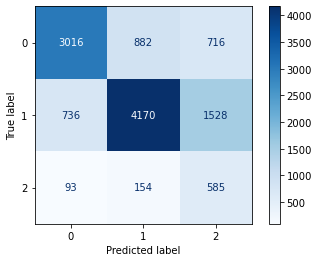

In [497]:
#plot confusion matrix
plot_confusion_matrix(logreg_clf, X_test, y_test, cmap = plt.cm.Blues)

AUC: 0.821508439571381


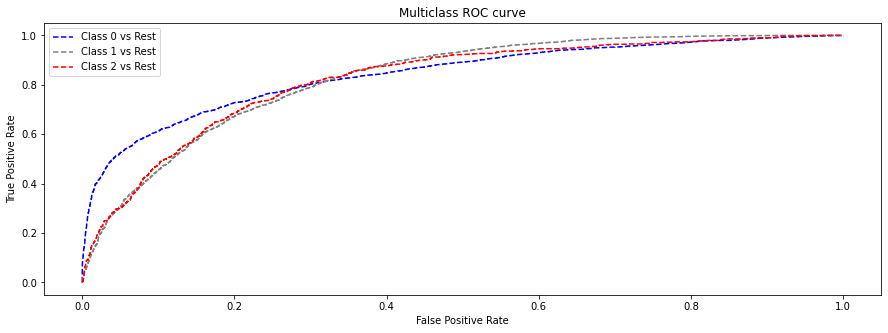

In [498]:
#get AUC
logreg_y_score = logreg_clf.fit(X_train, y_train).decision_function(X_test)

#roc curve for classes
logreg_fpr = {}
logreg_tpr = {}
logreg_thresh = {}

n_class = 3

for i in range(n_class):    
    logreg_fpr[i], logreg_tpr[i], logreg_thresh[i] = roc_curve(y_test, logreg_y_score[:, i], pos_label = i)

# plotting
plt.figure(figsize = (15, 5))
plt.plot(logreg_fpr[0], logreg_tpr[0], linestyle = '--',color = 'blue', label = 'Class 0 vs Rest')
plt.plot(logreg_fpr[1], logreg_tpr[1], linestyle = '--',color = 'gray', label = 'Class 1 vs Rest')
plt.plot(logreg_fpr[2], logreg_tpr[2], linestyle = '--',color = 'red', label = 'Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')

plt.savefig('./Data/logreg_roc')

#get AUC
print('AUC:', auc(logreg_fpr[i], logreg_tpr[i]))

In [499]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.23282828282828283
0.5544705188812934


In [500]:
#summary table
summary_table.loc[1] = ['Logistic Regression',
                        round(logreg_test_accuracy, 2), round(logreg_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        round(auc(logreg_fpr[i], logreg_tpr[i]), 2), bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.6,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907
1,Logistic Regression,65.41,0.74,0.6,0.67,0.58,0.41,0.55,0.74,0.82,0.232828,0.554471


# K-Nearest Neighbor

In [501]:
#instantiate baseline model
knn_clf = KNeighborsClassifier()

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

#Train accuracy: 87.64375605033882
#Test accuracy: 73.33333333333333

Train accuracy: 87.64375605033882
Test accuracy: 73.33333333333333


In [502]:
#set param grid
#knn_param_grid = {"n_neighbors" : [3, 5, 7, 10],
#                  'weights' : ['uniform', 'distance']}

#gridsearch
#knn_gridsearch = GridSearchCV(estimator = knn_clf,
#                             param_grid = knn_param_grid,
#                             scoring = 'accuracy', cv = 5,
#                             n_jobs = -1)

#fit
#knn_gridsearch.fit(X_train, y_train)

#best param
#knn_gridsearch.best_params_

#'n_neighbors': 3
#'weights': 'distance'

{'n_neighbors': 3, 'weights': 'distance'}

In [503]:
#get cross-validation result
#knn_cross_val_results = pd.DataFrame(knn_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(knn_cross_val_results))

#save
#knn_cross_val_results.to_csv('./Data/knn_cross_val_results')

#knn_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 8


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.217859,0.010784,106.766633,3.375557,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.791481,0.817554,0.819684,0.831752,0.850081,0.822110,0.019184,5
1,0.246206,0.008696,107.527787,0.090453,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.793353,0.831107,0.833817,0.846015,0.870087,0.834876,0.024913,1
2,0.347877,0.117723,115.058716,6.201667,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.784511,0.804582,0.804001,0.817296,0.833430,0.808764,0.016184,6
3,0.270654,0.017230,119.439850,0.055920,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.795611,0.828590,0.830526,0.841884,0.862665,0.831855,0.021799,2
4,0.620069,0.446564,78.169492,2.409327,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.774572,0.789739,0.789416,0.804518,0.819748,0.795599,0.015345,7


In [504]:
#train a classifier with optimal values identified above
knn_clf = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

#fit
knn_clf.fit(X_train, y_train)

#predict on the test set
y_hat_train = knn_clf.predict(X_train)
y_hat_test = knn_clf.predict(X_test)

#train accuracy 
knn_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(knn_train_accuracy))

#test accuracy 
knn_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(knn_test_accuracy))

#Train accuracy: 99.66698935140369
#Test accuracy: 75.22727272727273

Train accuracy: 99.66698935140369
Test accuracy: 75.22727272727273


In [505]:
#train cross validation
knn_train_cv_score = cross_val_score(knn_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', knn_train_cv_score)

#test cross validation
knn_test_cv_score = cross_val_score(knn_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', knn_test_cv_score)

Train cross validation: 0.8348757663762505
Test cross validation: 0.7241582491582491


In [506]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2812289562289562
Mean Squared Error: 0.3482323232323232
Root Mean Squared Error: 0.5901121276777179


In [507]:
#classification report
knn_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', knn_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      4614
           1       0.81      0.78      0.80      6434
           2       0.32      0.46      0.38       832

    accuracy                           0.75     11880
   macro avg       0.64      0.67      0.65     11880
weighted avg       0.77      0.75      0.76     11880



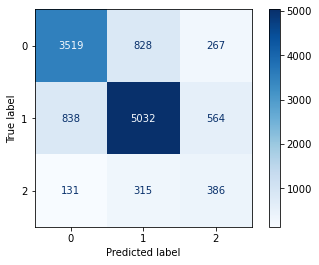

In [508]:
#plot
plot_confusion_matrix(knn_clf, X_test, y_test, cmap = plt.cm.Blues)    

In [509]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.04301346801346801
0.4044085566665533


In [510]:
#summary table
summary_table.loc[2] = ['KNN',
                        round(knn_test_accuracy, 2), round(knn_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.60,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907
1,Logistic Regression,65.41,0.74,0.60,0.67,0.58,0.41,0.55,0.74,0.82,0.232828,0.554471
2,KNN,75.23,0.72,0.64,0.67,0.65,0.28,0.35,0.59,-,0.043013,0.404409


# Bagged Tree

In [511]:
#instantiate baseline model
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21),
                                    random_state = 21)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

#Train accuracy: 98.86414972571798
#Test accuracy: 77.72727272727272

Train accuracy: 98.86414972571798
Test accuracy: 77.72727272727272


In [512]:
#set param grid
#bagged_tree_param_grid = {'n_estimators' : [20, 50, 100],
##                          'max_samples': [1, 5, 10, 20, 50],
 #                         'max_features': [1, 5, 10, 20, 50]}

#gridsearch
#bagged_tree_gridsearch = GridSearchCV(estimator = bagged_tree_clf, 
#                                        param_grid = bagged_tree_param_grid,
#                                        scoring = 'accuracy', cv = 5,
#                                        n_jobs = -1)

#fit
#bagged_tree_gridsearch.fit(X_train, y_train)

#best param
#bagged_tree_gridsearch.best_params_

#'bootstrap': False,
#'bootstrap_features': True,
#'max_features': 50,
#'max_samples': 50,
#'n_estimators': 100

{'max_features': 50, 'max_samples': 50, 'n_estimators': 100}

In [513]:
#get cross-validation result
#bagged_tree_cross_val_results = pd.DataFrame(bagged_tree_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(bagged_tree_cross_val_results))

#save
#bagged_tree_cross_val_results.to_csv('./Data/bagged_tree_cross_val_results')

#bagged_tree_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 75


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.680113,0.010620,0.037339,0.002767,1,1,20,"{'max_features': 1, 'max_samples': 1, 'n_estim...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,60
1,1.007122,0.018208,0.093215,0.000530,1,1,50,"{'max_features': 1, 'max_samples': 1, 'n_estim...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,60
2,1.518989,0.014071,0.164101,0.006035,1,1,100,"{'max_features': 1, 'max_samples': 1, 'n_estim...",0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,60
3,0.489907,0.146380,0.031901,0.011827,1,5,20,"{'max_features': 1, 'max_samples': 5, 'n_estim...",0.325395,0.362246,0.331139,0.333333,0.320103,0.334443,0.014647,58
4,0.740272,0.025685,0.080635,0.002095,1,5,50,"{'max_features': 1, 'max_samples': 5, 'n_estim...",0.317586,0.333333,0.333140,0.334560,0.339722,0.331668,0.007436,75


In [514]:
#train a classifier with optimal values identified above
bagged_tree_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 21,
                                                           criterion = 'gini',
                                                           max_depth = 40,
                                                           max_features = 'auto',
                                                           min_samples_leaf = 3,
                                                           min_samples_split = 8),
                                    random_state = 21,
                                    max_features = 50,
                                    max_samples = 50,
                                    n_estimators = 100)

#fit
bagged_tree_clf.fit(X_train, y_train)

#predict
y_hat_test = bagged_tree_clf.predict(X_test)
y_hat_train = bagged_tree_clf.predict(X_train)

#train accuracy
bagged_tree_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(bagged_tree_train_accuracy))

#test accuracy
bagged_tree_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(bagged_tree_test_accuracy))

#Train accuracy: 55.81800580832527
#Test accuracy: 52.07912457912458

Train accuracy: 55.81800580832527
Test accuracy: 52.07912457912458


In [515]:
#train cross validation
bagged_tree_train_cv_score = cross_val_score(bagged_tree_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', bagged_tree_train_cv_score)

#test cross validation
bagged_tree_test_cv_score = cross_val_score(bagged_tree_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', bagged_tree_test_cv_score)

Test cross validation: 0.5422781542433043
Train cross validation: 0.6100168350168349


In [516]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.5866161616161616
Mean Squared Error: 0.8014309764309764
Root Mean Squared Error: 0.8952267737456115


In [517]:
#classification report
bagged_tree_classification_report = classification_report(y_test, y_hat_test)
print('Model: Bagged Tree', '\n', bagged_tree_classification_report)

Model: Bagged Tree 
               precision    recall  f1-score   support

           0       0.60      0.61      0.60      4614
           1       0.77      0.45      0.57      6434
           2       0.14      0.59      0.23       832

    accuracy                           0.52     11880
   macro avg       0.50      0.55      0.47     11880
weighted avg       0.66      0.52      0.56     11880



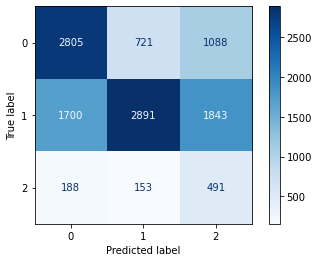

In [518]:
#plot confusion matrix
plot_confusion_matrix(bagged_tree_clf, X_test, y_test, cmap = plt.cm.Blues)

In [519]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.21136363636363636
0.6716346900543028


In [520]:
#summary table
summary_table.loc[3] = ['Bagged Tree',
                        round(bagged_tree_test_accuracy, 2), round(bagged_tree_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.60,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907
1,Logistic Regression,65.41,0.74,0.60,0.67,0.58,0.41,0.55,0.74,0.82,0.232828,0.554471
2,KNN,75.23,0.72,0.64,0.67,0.65,0.28,0.35,0.59,-,0.043013,0.404409
3,Bagged Tree,52.08,0.61,0.50,0.55,0.47,0.59,0.80,0.90,-,0.211364,0.671635


# Random Forest

In [521]:
#instantiate baseline model
random_forest_clf = RandomForestClassifier(random_state = 21)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

#Train accuracy: 99.75475959987092
#Test accuracy: 79.15824915824916

Train accuracy: 99.75475959987092
Test accuracy: 79.15824915824916


In [522]:
#set param grid
#random_forest_param_grid = {'n_estimators' : [20, 50, 100],
#                            'criterion' : ['gini', 'entropy'],
#                            'min_samples_split' : [8, 10, 12],
#                            'min_samples_leaf' : [3, 4, 5],
#                            'max_depth': [40, 80],
#                            'max_features': ['auto', 'sqrt', 'log2']}

#gridsearch
#random_forest_gridsearch = GridSearchCV(estimator = random_forest_clf, 
#                                        param_grid = random_forest_param_grid,
#                                        scoring = 'accuracy', cv = 5,
#                                        n_jobs = -1)

#fit
#random_forest_gridsearch.fit(X_train, y_train)

#best param
#random_forest_gridsearch.best_params_

#'criterion': 'gini',
#'max_depth': 40,
#'max_features': 'auto',
#'min_samples_leaf': 3,
#'min_samples_split': 8,
#'n_estimators': 100

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [523]:
#get cross-validation result
#random_forest_cross_val_results = pd.DataFrame(random_forest_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(random_forest_cross_val_results))

#save
#random_forest_cross_val_results.to_csv('./Data/random_forest_cross_val_results')

#random_forest_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 648


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.889753,0.067462,0.141957,0.007061,gini,40,auto,3,8,20,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.793030,0.833817,0.832720,0.846015,0.853372,0.831791,0.020859,95
1,13.433257,0.132612,0.363124,0.006481,gini,40,auto,3,8,50,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.795611,0.836399,0.835753,0.849823,0.856857,0.834889,0.021220,47
2,26.989119,0.129735,0.687151,0.009108,gini,40,auto,3,8,100,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.796580,0.839948,0.839238,0.850791,0.859761,0.837264,0.021704,1
3,5.873453,0.041796,0.134580,0.006509,gini,40,auto,3,10,20,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.791804,0.832010,0.831365,0.841626,0.850791,0.829519,0.020155,121
4,13.191386,0.299333,0.358245,0.015440,gini,40,auto,3,10,50,"{'criterion': 'gini', 'max_depth': 40, 'max_fe...",0.793804,0.834076,0.837238,0.845305,0.854921,0.833069,0.020916,79


In [524]:
#train a classifier with optimal values identified above
random_forest_clf = RandomForestClassifier(random_state = 21, 
                                           criterion = 'gini',
                                           max_depth = 40,
                                           max_features = 'auto',
                                           min_samples_leaf = 3,
                                           min_samples_split = 8,
                                           n_estimators = 100)

#fit
random_forest_clf.fit(X_train, y_train)

#predict
y_hat_train = random_forest_clf.predict(X_train)
y_hat_test = random_forest_clf.predict(X_test)

#train accuracy
random_forest_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(random_forest_train_accuracy))

#test accuracy
random_forest_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(random_forest_test_accuracy))

#Train accuracy: 89.52565343659245
#Test accuracy: 77.54208754208754

Train accuracy: 89.52565343659245
Test accuracy: 77.54208754208754


In [525]:
#train cross validation
random_forest_train_cv_score = cross_val_score(random_forest_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', random_forest_train_cv_score)

#test cross validation
random_forest_test_cv_score = cross_val_score(random_forest_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', random_forest_test_cv_score)

Train cross validation: 0.8372636334301389
Test cross validation: 0.765993265993266


In [526]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.2542929292929293
Mean Squared Error: 0.31372053872053873
Root Mean Squared Error: 0.5601076135177406


In [527]:
#classification report
random_forest_classification_report = classification_report(y_test, y_hat_test)
print('Model: Random Forest', '\n', random_forest_classification_report)

Model: Random Forest 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      4614
           1       0.83      0.80      0.82      6434
           2       0.34      0.58      0.43       832

    accuracy                           0.78     11880
   macro avg       0.67      0.72      0.68     11880
weighted avg       0.80      0.78      0.78     11880



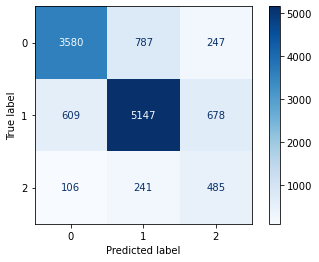

In [528]:
#plot confusion matrix
plot_confusion_matrix(random_forest_clf, X_test, y_test, cmap = plt.cm.Blues)

In [529]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.0755050505050505
0.421245103957646


In [530]:
#summary table
summary_table.loc[4] = ['Random Forest',
                        round(random_forest_test_accuracy, 2), round(random_forest_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head()

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.60,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907
1,Logistic Regression,65.41,0.74,0.60,0.67,0.58,0.41,0.55,0.74,0.82,0.232828,0.554471
2,KNN,75.23,0.72,0.64,0.67,0.65,0.28,0.35,0.59,-,0.043013,0.404409
3,Bagged Tree,52.08,0.61,0.50,0.55,0.47,0.59,0.80,0.90,-,0.211364,0.671635
4,Random Forest,77.54,0.77,0.67,0.72,0.68,0.25,0.31,0.56,-,0.075505,0.421245


# Gradient Boosting

In [533]:
#instantiate baseline model
gradient_boost_clf = GradientBoostingClassifier(random_state = 21)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

#Train accuracy: 73.94127137786383
#Test accuracy: 69.7979797979798

Train accuracy: 73.94127137786383
Test accuracy: 69.7979797979798


In [534]:
#set param grid
#gradient_boost_param_grid = {'learning_rate': [0.025, 0.05],
#                             'subsample': [0.5, 1.0]}

#gridsearch
#gradient_boost_gridsearch = GridSearchCV(estimator = gradient_boost_clf,
#                                         param_grid = gradient_boost_param_grid, 
#                                         scoring = 'accuracy',
#                                         n_jobs = -1,
#                                         cv = 5)

#fit
#gradient_boost_gridsearch.fit(X_train, y_train)

#best param
#gradient_boost_gridsearch.best_params_

#'learning_rate': 0.05, 
#'subsample': 0.5

{'learning_rate': 0.05, 'subsample': 0.5}

In [535]:
#get cross-validation result
#gradient_boost_cross_val_results = pd.DataFrame(gradient_boost_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(gradient_boost_cross_val_results))

#save
#gradient_boost_cross_val_results.to_csv('./Data/gradient_boost_cross_val_results')

#gradient_boost_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 4


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,249.079329,0.501925,0.641749,0.052700,0.025,0.5,"{'learning_rate': 0.025, 'subsample': 0.5}",0.640336,0.666731,0.665763,0.673185,0.666989,0.662601,0.011438,3
1,389.735568,0.756480,0.251643,0.044846,0.025,1,"{'learning_rate': 0.025, 'subsample': 1.0}",0.641304,0.668990,0.663504,0.669700,0.669055,0.662510,0.010837,4
2,250.205113,0.537401,0.453465,0.096493,0.05,0.5,"{'learning_rate': 0.05, 'subsample': 0.5}",0.672798,0.713972,0.704098,0.712359,0.715844,0.703814,0.016019,1
3,390.824656,0.763916,0.186609,0.046641,0.05,1,"{'learning_rate': 0.05, 'subsample': 1.0}",0.671636,0.708164,0.700290,0.708809,0.709132,0.699606,0.014363,2


In [536]:
#train a classifier with optimal values identified above
gradient_boost_clf = GradientBoostingClassifier(random_state = 21,
                                                max_depth = 40,
                                                max_features = 'auto',
                                                min_samples_leaf = 3,
                                                min_samples_split = 8,
                                                n_estimators = 100,
                                                learning_rate = 0.05,
                                                subsample = 0.5)

#fit
gradient_boost_clf.fit(X_train, y_train)

#predict
y_hat_train = gradient_boost_clf.predict(X_train)
y_hat_test = gradient_boost_clf.predict(X_test)

#train accuracy
gradient_boost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0}'.format(gradient_boost_train_accuracy))

#test accuracy
gradient_boost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0}'.format(gradient_boost_test_accuracy))

#Train accuracy: 99.62568570506615
#Test accuracy: 79.4949494949495

Train accuracy: 99.62568570506615
Test accuracy: 79.4949494949495


In [537]:
#train cross validation
gradient_boost_train_cv_score = cross_val_score(gradient_boost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_train_cv_score)

#test cross validation
gradient_boost_test_cv_score = cross_val_score(gradient_boost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', gradient_boost_test_cv_score)

Train cross validation: 0.8703581800580833
Train cross validation: 0.7791245791245792


In [538]:
#evaluate
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.22803030303030303
Mean Squared Error: 0.273989898989899
Root Mean Squared Error: 0.5234404445492333


In [539]:
#classification report
gradient_boost_classification_report = classification_report(y_test, y_hat_test)
print('Model: Gradient Boosting', '\n', gradient_boost_classification_report)

Model: Gradient Boosting 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      4614
           1       0.82      0.84      0.83      6434
           2       0.41      0.46      0.43       832

    accuracy                           0.79     11880
   macro avg       0.69      0.70      0.69     11880
weighted avg       0.80      0.79      0.80     11880



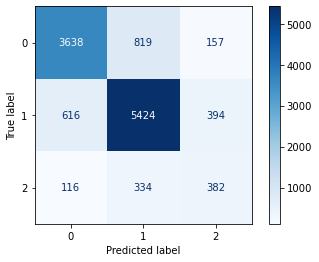

In [540]:
#plot confusion matrix
plot_confusion_matrix(gradient_boost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [541]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.02904040404040404
0.36268033165549995


In [542]:
#summary table
summary_table.loc[5] = ['Gradient Boost',
                        round(gradient_boost_test_accuracy, 2), round(gradient_boost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.60,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907
1,Logistic Regression,65.41,0.74,0.60,0.67,0.58,0.41,0.55,0.74,0.82,0.232828,0.554471
2,KNN,75.23,0.72,0.64,0.67,0.65,0.28,0.35,0.59,-,0.043013,0.404409
3,Bagged Tree,52.08,0.61,0.50,0.55,0.47,0.59,0.80,0.90,-,0.211364,0.671635
4,Random Forest,77.54,0.77,0.67,0.72,0.68,0.25,0.31,0.56,-,0.075505,0.421245
5,Gradient Boost,79.49,0.78,0.69,0.70,0.69,0.23,0.27,0.52,-,0.029040,0.362680


# AdaBoost

In [543]:
#instantiate baseline model
adaboost_clf = AdaBoostClassifier(random_state = 21)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy: {0} '.format(adaboost_train_accuracy))

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy: {0} '.format(adaboost_test_accuracy))

#Train accuracy: 65.12939657954179 
#Test accuracy: 63.86363636363637

Train accuracy: 65.12939657954179 
Test accuracy: 63.86363636363637 


In [544]:
#param
#adaboost_param_grid = {'learning_rate': [0.01, 0.05],
#                       'n_estimators' : [50, 100]}

#gridsearch
#adaboost_gridsearch = GridSearchCV(estimator = adaboost_clf,
#                                   param_grid = adaboost_param_grid,
#                                   scoring = 'accuracy',
#                                   n_jobs = -1,
#                                   cv = 5)

#fit
#adaboost_gridsearch.fit(X_train, y_train)

#best param
#adaboost_gridsearch.best_params_

#'learning_rate': 0.05, 
#'n_estimators': 100

{'learning_rate': 0.05, 'n_estimators': 100}

In [545]:
#get cross-validation result
#adaboost_cross_val_results = pd.DataFrame(adaboost_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(adaboost_cross_val_results))

#save
#adaboost_cross_val_results.to_csv('./Data/adaboost_cross_val_results')

#adaboost_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 4


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,41.952960,0.411161,1.039460,0.085281,0.01,50,"{'learning_rate': 0.01, 'n_estimators': 50}",0.455244,0.462343,0.463504,0.461052,0.460148,0.460458,0.002845,4
1,64.194194,0.636860,1.536448,0.095471,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.504808,0.525331,0.524556,0.524298,0.496999,0.515198,0.011935,3
2,41.981107,0.416257,1.027495,0.096725,0.05,50,"{'learning_rate': 0.05, 'n_estimators': 50}",0.510552,0.531978,0.529074,0.529268,0.532236,0.526621,0.008142,2
3,64.209046,0.865325,1.549332,0.218042,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.537786,0.551597,0.549919,0.548500,0.554179,0.548396,0.005632,1


In [546]:
#train a classifier with optimal values identified above
adaboost_clf = AdaBoostClassifier(random_state = 21,
                                  learning_rate = 0.05,
                                  n_estimators = 100)

#fit
adaboost_clf.fit(X_train, y_train)

#predict
y_hat_train = adaboost_clf.predict(X_train)
y_hat_test = adaboost_clf.predict(X_test)

#train accuracy
adaboost_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', adaboost_train_accuracy)

#test accuracy
adaboost_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', adaboost_test_accuracy)

#Train accuracy: 54.92223297838012
#Test accuracy: 57.398989898989896

Train accuracy: 54.92223297838012
Test accuracy: 57.398989898989896


In [547]:
#train cross validation
adaboost_train_cv_score = cross_val_score(adaboost_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', adaboost_train_cv_score)

#test cross validation
adaboost_test_cv_score = cross_val_score(adaboost_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', adaboost_test_cv_score)

Train cross validation: 0.5483962568570506
Test cross validation: 0.647895622895623


In [548]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.5263468013468013
Mean Squared Error: 0.727020202020202
Root Mean Squared Error: 0.8526547965150973


In [549]:
#classification report
adaboost_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', adaboost_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.66      0.49      0.56      4614
           1       0.72      0.65      0.68      6434
           2       0.15      0.47      0.22       832

    accuracy                           0.57     11880
   macro avg       0.51      0.54      0.49     11880
weighted avg       0.66      0.57      0.60     11880



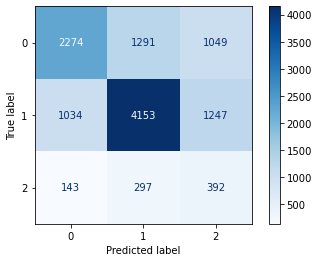

In [550]:
#plot confusion matrix
plot_confusion_matrix(adaboost_clf, X_test, y_test, cmap = plt.cm.Blues)

In [551]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.25412457912457914
0.5126259154394677


In [552]:
#summary table
summary_table.loc[6] = ['ADABoost',
                        round(adaboost_test_accuracy, 2), round(adaboost_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.60,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907
1,Logistic Regression,65.41,0.74,0.60,0.67,0.58,0.41,0.55,0.74,0.82,0.232828,0.554471
2,KNN,75.23,0.72,0.64,0.67,0.65,0.28,0.35,0.59,-,0.043013,0.404409
3,Bagged Tree,52.08,0.61,0.50,0.55,0.47,0.59,0.80,0.90,-,0.211364,0.671635
4,Random Forest,77.54,0.77,0.67,0.72,0.68,0.25,0.31,0.56,-,0.075505,0.421245
5,Gradient Boost,79.49,0.78,0.69,0.70,0.69,0.23,0.27,0.52,-,0.029040,0.362680
6,ADABoost,57.40,0.65,0.51,0.54,0.49,0.53,0.73,0.85,-,0.254125,0.512626


# XGBoost

In [555]:
#instantiate baseline model
xgb_clf = xgb.XGBClassifier(random_state = 21)

#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

#Train accuracy: 85.96708615682478
#Test accuracy: 77.28114478114479

Train accuracy: 85.96708615682478
Test accuracy: 77.28114478114479


In [556]:
#set param grid
#xgb_param_grid = {'booster' : ['gbtree', 'gblinear'],
#                  'min_child_weight' : [1, 3]}

#gridsearch
#xgb_gridsearch = GridSearchCV(estimator = xgb_clf, 
#                                        param_grid = xgb_param_grid,
#                                        scoring = 'accuracy', cv = 5,
#                                        n_jobs = -1)

#fit
#xgb_gridsearch.fit(X_train, y_train)

#best param
#xgb_gridsearch.best_params_

#'booster': 'gbtree', 
#'min_child_weight': 1

{'booster': 'gbtree', 'min_child_weight': 1}

In [557]:
#get cross-validation result
#xgb_cross_val_results = pd.DataFrame(xgb_gridsearch.cv_results_)
#print('Number of Various Combinations of Parameters Tried : %d'%len(xgb_cross_val_results))

#save
#xgb_cross_val_results.to_csv('./Data/xgb_cross_val_results')

#xgb_cross_val_results.head()

Number of Various Combinations of Parameters Tried : 4


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,255.059028,0.754106,0.247157,0.023198,gbtree,1,"{'booster': 'gbtree', 'min_child_weight': 1}",0.763795,0.834914,0.831881,0.844724,0.848338,0.824731,0.031065,1
1,254.921704,0.478157,0.245729,0.011456,gbtree,3,"{'booster': 'gbtree', 'min_child_weight': 3}",0.762956,0.837367,0.831494,0.845176,0.844272,0.824253,0.031049,2
2,47.901532,0.237030,0.096911,0.019176,gblinear,1,"{'booster': 'gblinear', 'min_child_weight': 1}",0.542949,0.555857,0.545660,0.544240,0.545337,0.546809,0.004623,3
3,47.794966,0.154838,0.091371,0.009730,gblinear,3,"{'booster': 'gblinear', 'min_child_weight': 3}",0.542949,0.555857,0.545660,0.544240,0.545337,0.546809,0.004623,3


In [558]:
#train a classifier with optimal values identified above
xgb_clf = xgb.XGBClassifier(random_state = 21,
                            booster = 'gbtree',
                            min_child_weight = 1)

#fit
xgb_clf.fit(X_train, y_train)

#predict
y_hat_train = xgb_clf.predict(X_train)
y_hat_test = xgb_clf.predict(X_test)

#train accuracy
xgb_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', xgb_train_accuracy)

#test accuracy
xgb_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', xgb_test_accuracy)

#Train accuracy: 99.80509841884478
#Test accuracy: 79.78956228956228

Train accuracy: 85.96708615682478
Test accuracy: 77.28114478114479


In [559]:
#train cross validation
xgb_train_cv_score = cross_val_score(xgb_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', xgb_train_cv_score)

#test cross validation
xgb_test_cv_score = cross_val_score(xgb_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', xgb_test_cv_score)

Train cross validation: 0.824730558244595
Test cross validation: 0.7751683501683502


In [560]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

Mean Absolute Error: 0.255050505050505
Mean Squared Error: 0.31077441077441076
Root Mean Squared Error: 0.5574714439093815


In [561]:
#classification report
xgb_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', xgb_classification_report)

Model: adaBoost 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      4614
           1       0.82      0.81      0.82      6434
           2       0.35      0.55      0.42       832

    accuracy                           0.77     11880
   macro avg       0.67      0.71      0.68     11880
weighted avg       0.79      0.77      0.78     11880



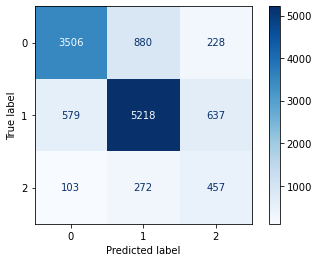

In [562]:
#plot confusion matrix
plot_confusion_matrix(xgb_clf, X_test, y_test, cmap = plt.cm.Blues)

In [563]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

0.0771043771043771
0.405605182010906


In [564]:
#summary table
summary_table.loc[7] = ['XGBoost',
                        round(xgb_test_accuracy, 2), round(xgb_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head(10)

,Model,Accuracy,CV,Precision,Recall,F1 Score,MAE,MSE,RMSE,AUC,Bias,Variance
0,Decision Tree,70.35,0.69,0.60,0.66,0.61,0.34,0.43,0.66,-,0.087879,0.465907
1,Logistic Regression,65.41,0.74,0.60,0.67,0.58,0.41,0.55,0.74,0.82,0.232828,0.554471
2,KNN,75.23,0.72,0.64,0.67,0.65,0.28,0.35,0.59,-,0.043013,0.404409
3,Bagged Tree,52.08,0.61,0.50,0.55,0.47,0.59,0.80,0.90,-,0.211364,0.671635
4,Random Forest,77.54,0.77,0.67,0.72,0.68,0.25,0.31,0.56,-,0.075505,0.421245
5,Gradient Boost,79.49,0.78,0.69,0.70,0.69,0.23,0.27,0.52,-,0.029040,0.362680
6,ADABoost,57.40,0.65,0.51,0.54,0.49,0.53,0.73,0.85,-,0.254125,0.512626
7,XGBoost,77.28,0.78,0.67,0.71,0.68,0.26,0.31,0.56,-,0.077104,0.405605


# Support Vector Machine

In [ ]:
#instantiate baseline model
svm_clf = SVC(random_state = 21)

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

#train accuracy
svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', svm_train_accuracy)

#test accuracy
svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', svm_test_accuracy)

#Train accuracy: 80.3162310422717
#Test accuracy: 73.0050505050505

In [ ]:
#set param grid
#svm_param_grid = {'decision_function_shape': ['ovo', 'ovr']}

#gridsearch
#svm_gridsearch = GridSearchCV(estimator = svm_clf,
#                              param_grid = svm_param_grid,
#                              scoring = 'accuracy', cv = 5,
#                              n_jobs = -1)

#fit
#svm_gridsearch.fit(X_train, y_train)

#best param
#svm_gridsearch.best_params_

#'decision_function_shape': 'ovo'

In [ ]:
#train a classifier with optimal values identified above
svm_clf = SVC(random_state = 21, decision_function_shape = 'ovo')

#fit
svm_clf.fit(X_train, y_train)

#predict
y_hat_train = svm_clf.predict(X_train)
y_hat_test = svm_clf.predict(X_test)

#train accuracy
svm_train_accuracy = accuracy_score(y_train, y_hat_train) * 100
print('Train accuracy:', svm_train_accuracy)

#test accuracy
svm_test_accuracy = accuracy_score(y_test, y_hat_test) * 100
print('Test accuracy:', svm_test_accuracy)

#Train accuracy: 80.3162310422717
#Test accuracy: 73.0050505050505

In [ ]:
#train cross validation
svm_train_cv_score = cross_val_score(svm_clf, X_train, y_train, cv = 5, n_jobs = -1).mean()
print('Train cross validation:', svm_train_cv_score)

#test cross validation
svm_test_cv_score = cross_val_score(svm_clf, X_test, y_test, cv = 5, n_jobs = -1).mean()
print('Test cross validation:', svm_test_cv_score)

In [ ]:
#evaluate with MAE, MSE, RMSE
print('Mean Absolute Error:', mean_absolute_error(y_test, y_hat_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_hat_test))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_hat_test, squared = False))

In [ ]:
#classification report
svm_classification_report = classification_report(y_test, y_hat_test)
print('Model: adaBoost', '\n', svm_classification_report)

In [ ]:
#plot confusion matrix
plot_confusion_matrix(svm_clf, X_test, y_test, cmap = plt.cm.Blues)

In [ ]:
#get test bias and variance
print(bias(y_test, y_hat_test))
print(variance(y_hat_test))

In [ ]:
#summary table
summary_table.loc[8] = ['SVM',
                        round(svm_test_accuracy, 2), round(svm_test_cv_score, 2), 
                        round(precision_score(y_test, y_hat_test, average = 'macro'), 2), round(recall_score(y_test, y_hat_test, average = 'macro'), 2), round(f1_score(y_test, y_hat_test, average = 'macro'), 2),
                        round(mean_absolute_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test), 2), round(mean_squared_error(y_test, y_hat_test, squared = False), 2),
                        '-', bias(y_test, y_hat_test), variance(y_hat_test)]
summary_table.head(10)

In [ ]:
#save
summary_table.to_csv('./Data/summary_table')

# Models Comparison

In [ ]:
#plot accuracy
plt.figure(figsize = (15, 5))
sns.boxplot(x = summary_table['Accuracy'], y = summary_table['Model'], s = 100, marker = 'o')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title("Accuracy Comparison")

plt.savefig('./Data/models_comparison')

# Submission Dataframe

In [ ]:
prediction = clf.predict(test_values[features])
prediction_df = pd.DataFrame(prediction, columns=["status_group"])
submission = pd.merge(test_values.id.reset_index()["id"].to_frame(), prediction_df, right_index = True, left_index = True)
submission.head()
submission.to_csv("sub.csv", index = False)